In [1]:
from src.classification import SpectralClassifier

In [2]:
classifier = SpectralClassifier(datapath="./retrieved_data.csv", num_spectra=500, num_wl=500, classifier_layers=[32, 32])


checking for presaved csv at path: ./retrieved_data.csv
cleaned...


In [3]:
classifier.train(epochs=100,verbose=True)

/home/deanhazineh/SEAS_Classes/AC207/dev_branch/team23_2023/src/classification/classifier.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(self.y_int, dtype=torch.long)


Epoch 0, Loss: 1.0159966945648193, Train Acc: 49.71%, Test Acc: 55.81%
Epoch 1, Loss: 0.9329546093940735, Train Acc: 50.88%, Test Acc: 56.98%
Epoch 2, Loss: 0.8710289001464844, Train Acc: 59.12%, Test Acc: 66.28%
Epoch 3, Loss: 0.6846742033958435, Train Acc: 67.94%, Test Acc: 73.26%
Epoch 4, Loss: 0.6948860287666321, Train Acc: 73.24%, Test Acc: 77.91%
Epoch 5, Loss: 0.9251534342765808, Train Acc: 78.24%, Test Acc: 81.40%
Epoch 6, Loss: 0.734281063079834, Train Acc: 77.94%, Test Acc: 81.40%
Epoch 7, Loss: 0.6668843626976013, Train Acc: 79.41%, Test Acc: 83.72%
Epoch 8, Loss: 0.5363871455192566, Train Acc: 79.71%, Test Acc: 83.72%
Epoch 9, Loss: 0.5402658581733704, Train Acc: 79.71%, Test Acc: 84.88%
Epoch 10, Loss: 0.4548676908016205, Train Acc: 79.71%, Test Acc: 84.88%
Epoch 11, Loss: 0.728834867477417, Train Acc: 79.71%, Test Acc: 83.72%
Epoch 12, Loss: 0.6953615546226501, Train Acc: 80.29%, Test Acc: 84.88%
Epoch 13, Loss: 0.5949541330337524, Train Acc: 79.41%, Test Acc: 83.72%
Epoc

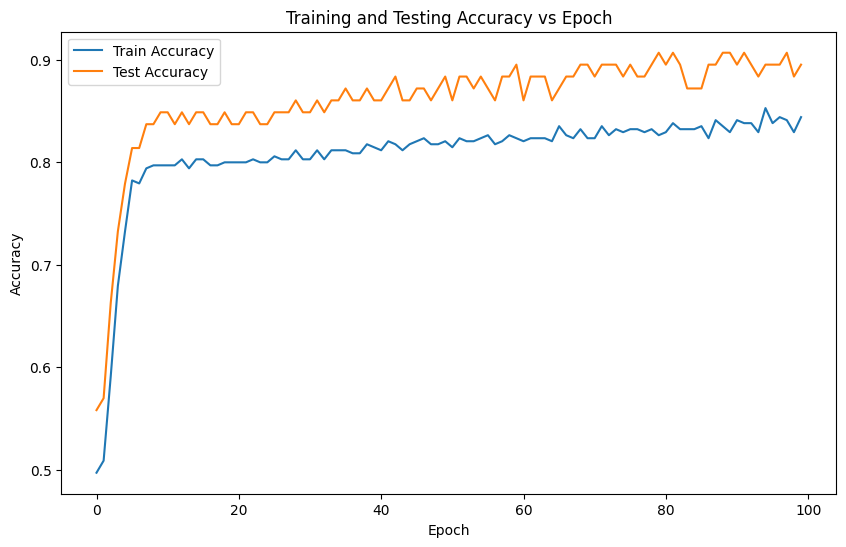

In [4]:
classifier.plot_train_accuracy()
plt.show()

In [5]:
## Try out the model on some new data that we pass in
from src.data_retrieval import GetData

# Load some real spectra instead of making up curves
data_retriever = GetData()
load_num_spec = 20
df = data_retriever.retrieve_sdss_data(
    sql_query=f"""
        SELECT TOP {load_num_spec} s.fiberid, s.plate, s.mjd, s.run2d, s.class
        FROM PhotoObj AS p
        JOIN SpecObj AS s ON s.bestobjid = p.objid
        """
)


Identifier info retrieved successfully.

/home/deanhazineh/anaconda3/envs/dev/lib/python3.11/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [6]:
lam = df["lam"].values
flux = df["flux"].values

In [7]:
prob, predicted_label = classifier.transform_predict(lam, flux)
print("Predicted Labels: ", predicted_label)

true_labels = df["class"].values
print("Correct Prediction Boolean: ", [ predicted_label[i]==true_labels[i] for i in range(len(predicted_label))])

cleaned...
Predicted Labels:  ['GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'QSO']
Correct Prediction Boolean:  [True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True]
